In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('obesity/childhood-obesity-borough-filtered.csv', header=0, index_col=1)

df['Unhealthy Weight Index'] = df['Reception Overweight'] + 2 * df['Reception Obese'] + 1.5 * df['Year 6 Overweight'] + 3 * df['Year 6 Obese']
df.head()

,Local Authority,Reception Overweight,Year 6 Overweight,Reception Obese,Year 6 Obese,Unhealthy Weight Index
Year,,,,,,
2006,Barking And Dagenham,13.744655,16.269165,14.416616,20.783646,129.332571
2007,Barking And Dagenham,14.880383,16.582406,13.492823,23.913043,138.478769
2008,Barking And Dagenham,14.657837,16.060291,12.141280,24.220374,135.691957
2009,Barking And Dagenham,13.569861,15.673828,14.081931,23.583984,135.996419
2010,Barking And Dagenham,13.966858,16.996234,13.831586,24.246704,139.864494


#### Now let's see the data for Islington

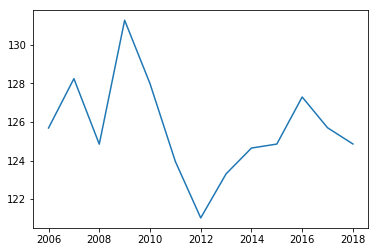

In [99]:
bor_df = df[df['Local Authority'] == 'Islington']
years = np.arange(2006, 2019)
isl_index = bor_df['Unhealthy Weight Index'].to_numpy()

plt.plot(years, isl_index)
plt.show()

In [100]:
sports_df = pd.read_csv('london_sports_participation.csv', header=0)

valid_bors = set(dict.fromkeys(df['Local Authority']))
valid_bors.add('City of London')
sports_df = sports_df[sports_df['area'].isin(valid_bors)].reset_index(drop=True)

sports_df['sports_participation'].replace({
    "zero": 0,
    "one+": 1,
    "three+": 2}, inplace=True)

sports_df['year'] = sports_df['year'].apply(lambda x: int(x[:4]))
sports_df = sports_df.dropna()
sports_df = sports_df.sort_values(['area', 'year', 'sports_participation'])


In [101]:
to_drop = []
mod_df = pd.DataFrame(columns=['year', 'area', 'sports_index'])

for name, group in sports_df.groupby(['area', 'year']):
    if len(group) == 3:
        group.iloc[2]['percentage'] -= group.iloc[1]['percentage']
        response_rate = group['percentage'].sum()
        group['percentage'] /= response_rate
        mod_df = mod_df.append(group)
mod_df = mod_df.reset_index(drop=True)
mod_df

,area,area_code,percentage,population,sports_index,sports_participation,year
0,Barking And Dagenham,00AB,0.602351,77100.0,NaN,0.0,2005
1,Barking And Dagenham,00AB,0.282076,36100.0,NaN,1.0,2005
2,Barking And Dagenham,00AB,0.115573,14800.0,NaN,2.0,2005
3,Barking And Dagenham,00AB,0.611969,80200.0,NaN,0.0,2007
4,Barking And Dagenham,00AB,0.258687,33900.0,NaN,1.0,2007
...,...,...,...,...,...,...,...
955,Westminster,00BK,0.393208,86200.0,NaN,1.0,2014
956,Westminster,00BK,0.200179,43900.0,NaN,2.0,2014
957,Westminster,00BK,0.466173,90100.0,NaN,0.0,2015
958,Westminster,00BK,0.376321,72200.0,NaN,1.0,2015


In [102]:
sports_wm = lambda x: np.average(x, weights=[0, 1, 2])
modd_df = mod_df.loc[::3, ['area', 'year']].reset_index(drop=True)
modd_df['sports_index'] = mod_df.groupby(['area', 'year'], as_index=False).agg(sports_index=('percentage', sports_wm))
modd_df

,area,year,sports_index
0,Barking And Dagenham,2005,0.171074
1,Barking And Dagenham,2007,0.172458
2,Barking And Dagenham,2008,0.200818
3,Barking And Dagenham,2009,0.172011
4,Barking And Dagenham,2010,0.172815
...,...,...,...
315,Westminster,2011,0.278674
316,Westminster,2012,0.267318
317,Westminster,2013,0.257762
318,Westminster,2014,0.264522


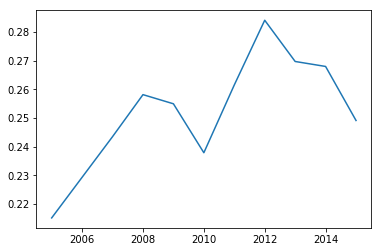

In [103]:
isl_sports = modd_df[(modd_df['area'] == 'Islington')]['sports_index'].to_numpy()
years = modd_df[(modd_df['area'] == 'Islington')]['year'].to_numpy()
plt.plot(years, isl_sports)
plt.show()


In [109]:
w_df = df.reset_index().rename(columns={'Local Authority': 'area', 'Year': 'year'})
comb_df = modd_df.merge(w_df, how='inner', on=['area', 'year'])

,area,year,sports_index,Reception Overweight,Year 6 Overweight,Reception Obese,Year 6 Obese,Unhealthy Weight Index
0,Barking And Dagenham,2007,0.172458,14.880383,16.582406,13.492823,23.913043,138.478769
1,Barking And Dagenham,2008,0.200818,14.657837,16.060291,12.141280,24.220374,135.691957
2,Barking And Dagenham,2009,0.172011,13.569861,15.673828,14.081931,23.583984,135.996419
3,Barking And Dagenham,2010,0.172815,13.966858,16.996234,13.831586,24.246704,139.864494
4,Barking And Dagenham,2011,0.184000,12.949411,15.310786,13.713013,26.919561,144.100300
...,...,...,...,...,...,...,...,...
283,Westminster,2011,0.278674,12.203877,15.500795,11.270639,24.801272,132.400162
284,Westminster,2012,0.267318,12.040657,14.090909,11.571540,25.303030,132.229192
285,Westminster,2013,0.257762,12.450100,14.404200,10.652500,25.641000,132.284400
286,Westminster,2014,0.264522,12.096774,14.909091,9.530792,24.454545,126.885630


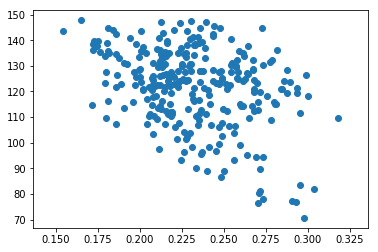

In [111]:
weights = comb_df['Unhealthy Weight Index'].to_numpy()
sports = comb_df['sports_index'].to_numpy()

plt.scatter(sports, weights)
plt.show()

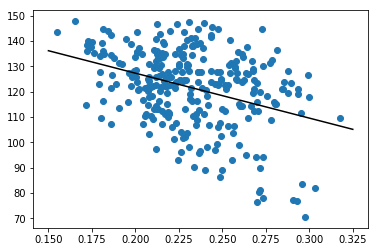

In [123]:
sports_arr = np.ones((len(sports), 2))
sports_arr[:, 0] = sports
coef = np.linalg.lstsq(sports_arr, weights)[0]

m = coef[0]
b = coef[1]
x_vals = np.array([0.15, 0.325])
plt.plot(x_vals, m * x_vals + b, 'k')
plt.scatter(sports, weights)
plt.show()

In [125]:
resids = sports_arr @ coef - weights
sum_sq = np.var(weights) * len(weights)
r_sq = 1 - sum(resids**2) / sum_sq
r_sq

0.1281676504944863